In [1]:
import pandas as pd
import numpy as np
import random
import time

In [2]:
days = "Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, Saturday".split(", ")

N = 10000

numbers_uniform = [int(x) for x in np.random.uniform(low=10, high=900, size=N)]
numbers_normal = [int(x) for x in np.random.normal(loc=150, scale=25, size=N)]
numbers_chi = [int(x)*13 if x>5 else int(x) for x in np.random.chisquare(df=10, size=N)]
negative_numbers_chi = [max(numbers_chi) -x for x in numbers_chi]
numbers_binom = [int(x) for x in np.random.binomial(n=50, p=0.3, size=N)]
weird_dist = [np.arctan(x)*x**5 for x in range(0,N)]
numbers = numbers_uniform
df = pd.DataFrame([random.choices(days,k=N), random.choices(numbers, k=N)], index=["days", "sessions"]).T

In [3]:
df['days'] = pd.Categorical(df['days'], categories=days)

<AxesSubplot:>

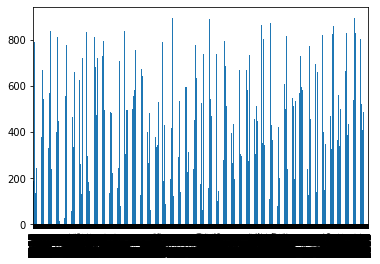

In [4]:
df.sort_values('days',inplace=True)
df['days'].cat.codes
#df['sessions'].plot(kind='bar')

In [32]:
sample = [1,2,3,4,5,6,7,8,9,10,100]
sample = [.1,1,2.3,3.1,3.5,4.2,5.1,6,7.3,201.5,211.2]
sample = [1, 2, 3, 5, 8, 9, 12, 300, 420, 8, 4, 2, 9]

In [22]:
def mean_and_std(sample):
    #create variables for mean and std from a sample
    sample = np.array(sample)
    sample_mean = sample.mean()
    sample_std = sample.std() #from documentation I saw that this is over the population. That is, 1/N.
    
    return sample_mean, sample_std
mean_and_std(sample)

(14.090909090909092, 27.304526915561905)

In [ ]:
'''
while true:
    std, mean = take the std and the mean from the other function.
    if x is an outlier (x> ..... or x< .....): 
       remove x.
    calculate again the std, mean and put them into new variables.
    if they are equal to the old std, mean: 
         break the loop and return the mean. 
'''

In [37]:
#DETECT OUTLIERS
def validation(sample, cutoff):
    #get mean and std from the previous function and return the new mean
    #with precision of 2 decimal points
    first_results = mean_and_std(sample)
    mean_before, std_before = first_results[0], first_results[1]

    while True:
        for number in sample:
            if number > mean_before+cutoff*std_before or number < mean_before-cutoff*std_before:
                sample.remove(number)

        sample = np.array(sample)
        mean_after = sample.mean()
        std_after = sample.std()
        new_mean = round(sample.mean(),2)
        if mean_after == mean_before and std_after == std_before:
            break
        else:
            mean_before = mean_after
            std_before = std_after
            sample = sample.tolist()
    print(sample)
    return new_mean

In [36]:
mean_and_std(sample)
validation(sample,2)

[ 1  2  3  5  8  9 12  8  4  2  9]


5.73

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [2. 0.]
 [2. 1.]
 [3. 0.]
 [3. 1.]
 [4. 0.]
 [4. 1.]]
